### This Notebook is to test the Monte Carlo facilities of PyNeb. It is aimed to compare results obtained with keyword 'orig', which are the results using the original data, with the results obtained with keyword 'median'. All the getCrossTemDen are made using Machine Learning. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn

In [2]:
%load_ext autoreload
%aimport pipeline
%autoreload 1

In [3]:
pn.log_.level = 2
Te_corr = 3000
if Te_corr is None:
    PDF_name = 'figures/NGC6778_NoCorr'
else:
    PDF_name = 'figures/NGC6778_b_{}'.format(Te_corr)

PL = pipeline.PipeLine(data_dir = '/Users/christophemorisset/DATA/MUSE_Jorge/hektor_fits/ngc6778_maps/NGC6778_MUSEstat_maps/maps',
                       name = 'NGC6778_MUSE_b_*.fits', error_str='error', err_default=0.05,
                       PDF_name=PDF_name)

PL.obs.addSum(('O1r_7771A', 'O1r_7773A', 'O1r_7775A'), 'O1r_7773+')
PL.obs.removeLine('O1r_7771A')
PL.obs.removeLine('O1r_7773A')
PL.obs.removeLine('O1r_7775A')

PL.add_MC(50)
print('Data shape:', PL.obs.data_shape)
print('Number of lines , valid ones: ', PL.obs.n_lines,PL.obs.n_valid_lines)

warng EmissionLine: line 7771A for atom O1r not valid
warng EmissionLine: line 7773A for atom O1r not valid
warng EmissionLine: line 7775A for atom O1r not valid
Data shape: (150, 150, 51)
Number of lines , valid ones:  40 40


In [4]:
PL.obs.def_EBV()
np.nanmedian(PL.obs.extinction.cHbeta)

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4742: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo


0.6344032668332327

/Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/core/pynebcore.py:4742: RuntimeWarning: invalid value encountered in true_divide
  obs_over_theo = (line1.obsIntens / line2.obsIntens) / r_theo
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
<ipython-input-5-cdd44345138a>:4: RuntimeWarning: invalid value encountered in true_divide
  image = PL.get_image(PL.obs.extinction.cHbeta, type_='orig') / PL.get_image(PL.obs.extinction.cHbeta, type_='median')


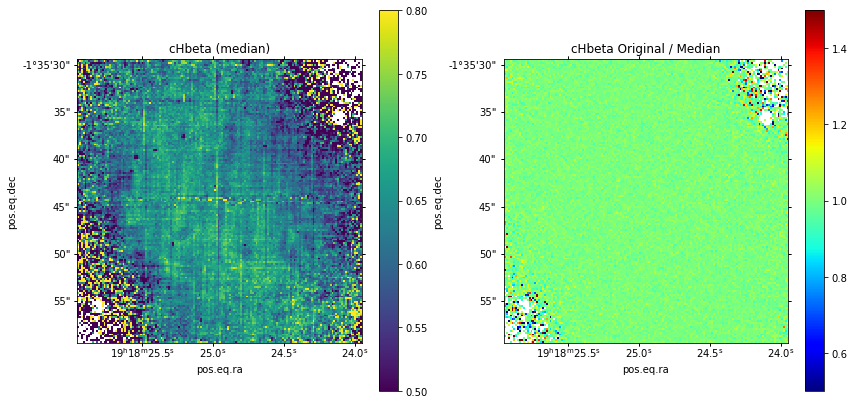

In [5]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw={'projection': PL.obs.wcs})
PL.red_cor_obs(EBV_min = 0., plot_=True, ax=ax1, vmin=0.5, vmax=.8, title='cHbeta (median)',
        label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)
image = PL.get_image(PL.obs.extinction.cHbeta, type_='orig') / PL.get_image(PL.obs.extinction.cHbeta, type_='median')
PL.plot(ax=ax2, image=image, vmin=0.5, vmax=1.5, cmap='jet', title='cHbeta Original / Median',
        label_cut=('H1r_6563A', 'H1r_4861A'), SN_cut=2.5)

/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:363: RuntimeWarning: invalid value encountered in subtract
  I_5755_new = I_5755 - R_5755_5679*I_5679
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:263: RuntimeWarning: invalid value encountered in log10
  this_image = np.log10(this_image)
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:400: RuntimeWarning: invalid value encountered in subtract
  I_7325_new = I_7325 - R_7325_REC * I_REC
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:404: RuntimeWarning: invalid value encountered in true_divide
  line.corrIntens = I_7325_new * I_7320 / I_7325
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:406: RuntimeWarning: invalid value encountered in true_divide
  line.corrIntens = I_7325_new * I_7330 / I_7325


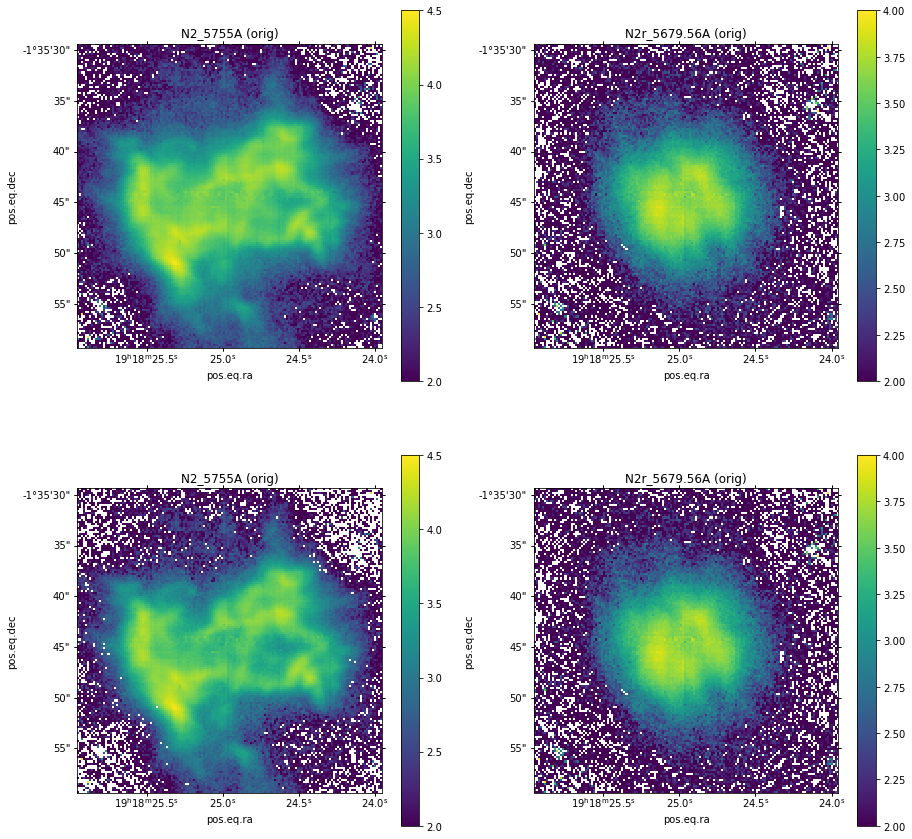

In [6]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15), 
                                                       subplot_kw={'projection': PL.obs.wcs})

PL.plot(ax=ax1, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax2, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.correc_NII(Te_corr)
PL.plot(ax=ax3, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax4, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.correc_OII(Te_corr, rec_label='O2r_4649.13A')

In [7]:
PL.obs.getSortedLines()

[Line Ar3 Ar3_7136A,
 Line Ar3 Ar3_7751A,
 Line Ar4 Ar4_4711A,
 Line Ar4 Ar4_4740A,
 Line Ar5 Ar5_7005A,
 Line C1 C1_8728A,
 Line C2r C2r_5342.0A,
 Line C2r C2r_6462.0A,
 Line Cl3 Cl3_5518A,
 Line Cl3 Cl3_5538A,
 Line Cl4 Cl4_7531A,
 Line Cl4 Cl4_8046A,
 Line H1r H1r_4861A,
 Line H1r H1r_6563A,
 Line H1r H1r_8750A,
 Line H1r H1r_9229A,
 Line He1r He1r_4713A,
 Line He1r He1r_5876A,
 Line He1r He1r_6678A,
 Line He1r He1r_7065A,
 Line He1r He1r_7281A,
 Line He2r He2r_4686A,
 Line N1 N1_5200A,
 Line N2 N2_5755A,
 Line N2 N2_6548A,
 Line N2 N2_6584A,
 Line N2r N2r_5676.02A,
 Line N2r N2r_5679.56A,
 Line O1 O1_6300A,
 Line O1 O1_6364A,
 Line O1r O1r_7773+,
 Line O2 O2_7320A,
 Line O2 O2_7330A,
 Line O2r O2r_4649.13A,
 Line O2r O2r_4661.63A,
 Line O3 O3_4959A,
 Line S2 S2_6716A,
 Line S2 S2_6731A,
 Line S3 S3_6312A,
 Line S3 S3_9069A]

In [8]:
errors = PL.obs.getError()
intenses = PL.obs.getIntens()
for line in PL.obs.getSortedLines():
    error = PL.obs.reshape(errors[line.label])[:,:,0]
    intens = PL.obs.reshape(intenses[line.label])[:,:,0]
    mask = np.isfinite(error) & (intens > 0.1)
    print('{:15s} {:9.3f} '.format(line.label, np.nanmedian(error[mask])))


Ar3_7136A           0.053 
Ar3_7751A           0.092 
Ar4_4711A           0.560 
Ar4_4740A           0.375 
Ar5_7005A           0.711 
C1_8728A            0.484 
C2r_5342.0A         0.566 
C2r_6462.0A         0.468 
Cl3_5518A           0.283 
Cl3_5538A           0.310 
Cl4_7531A           0.454 
Cl4_8046A           0.377 
H1r_4861A           0.052 
H1r_6563A           0.050 
H1r_8750A           0.176 
H1r_9229A           0.104 
He1r_4713A          0.488 
He1r_5876A          0.055 
He1r_6678A          0.064 
He1r_7065A          0.082 
He1r_7281A          0.225 
He2r_4686A          0.343 
N1_5200A            0.164 
N2_5755A            0.144 
N2_6548A            0.051 
N2_6584A            0.050 
N2r_5676.02A        0.540 
N2r_5679.56A        0.400 
O1_6300A            0.118 
O1_6364A            0.193 
O1r_7773+           0.851 
O2_7320A            0.100 
O2_7330A            0.118 
O2r_4649.13A        0.325 
O2r_4661.63A        0.473 
O3_4959A            0.051 
S2_6716A            0.054 
S

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


0.6344032668332327


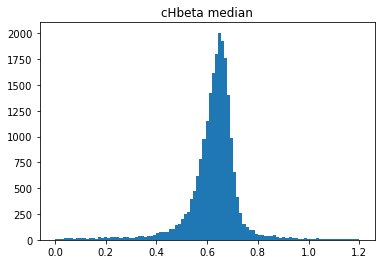

In [9]:
f, ax = plt.subplots()
ax.hist(PL.get_image(PL.obs.extinction.cHbeta, type_='median').ravel(), bins=np.linspace(0, 1.2, 100))
ax.set_title('cHbeta median')
print(np.nanmedian(PL.obs.extinction.cHbeta));

/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:263: RuntimeWarning: invalid value encountered in log10
  this_image = np.log10(this_image)
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:194: RuntimeWarning: divide by zero encountered in true_divide
  return self.get_image(label=label[0], type_=type_) / self.get_image(label=label[1], type_=type_)
/Users/christophemorisset/Google Drive/Pro/MUSE_PNe/pipeline.py:194: RuntimeWarning: invalid value encountered in true_divide
  return self.get_image(label=label[0], type_=type_) / self.get_image(label=label[1], type_=type_)


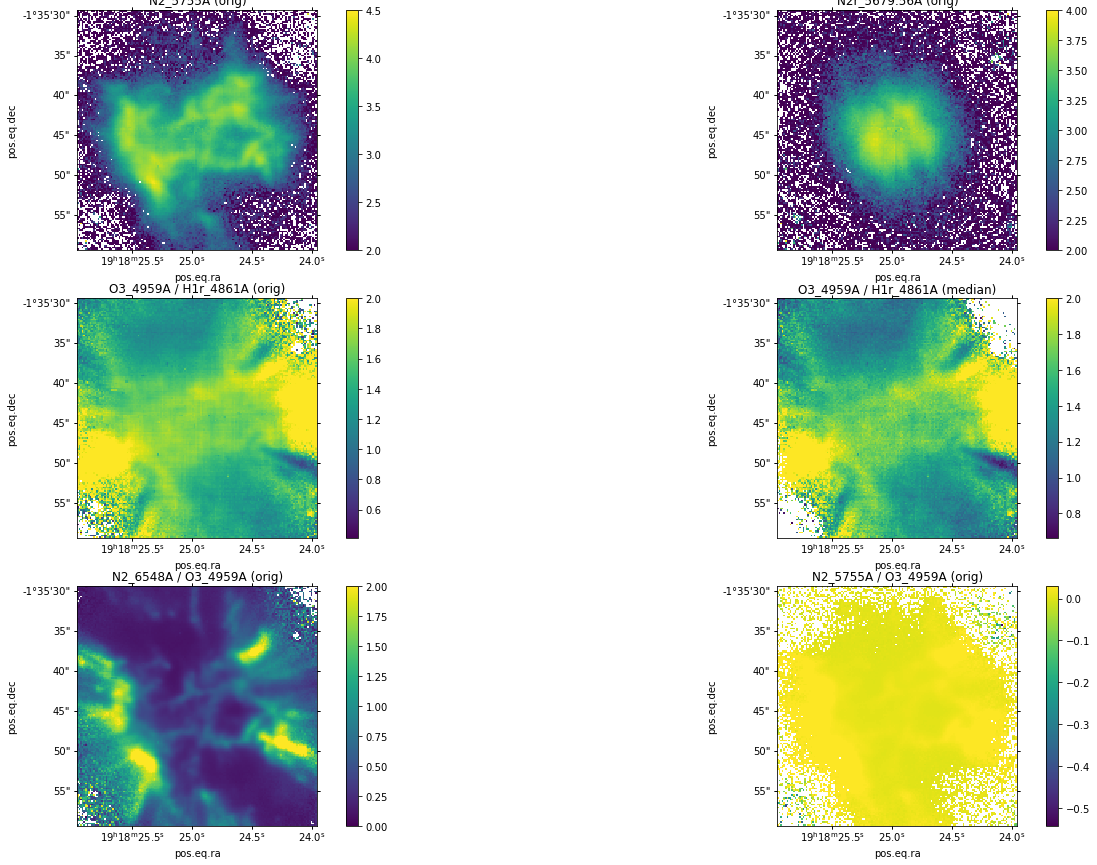

In [10]:
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(23, 15), subplot_kw={'projection': PL.obs.wcs})
PL.plot(ax=ax1, label='N2_5755A', type_='orig', use_log=True, vmin=2, vmax=4.5, SN_cut=None)
PL.plot(ax=ax2, label='N2r_5679.56A', type_='orig', use_log=True, vmin=2, vmax=4., SN_cut=None)
PL.plot(ax=ax3, label=('O3_4959A', 'H1r_4861A'), type_='orig', vmax=2, SN_cut=(2.5, 2.5))
PL.plot(ax=ax4, label=('O3_4959A', 'H1r_4861A'), type_='median', vmax=2, SN_cut=(4.5, 4.5))
PL.plot(ax=ax5, label=('N2_6548A', 'O3_4959A'), type_='orig', vmax=2, SN_cut=(2.5, 2.5))
PL.plot(ax=ax6, label=('N2_5755A', 'O3_4959A'), type_='orig', vmax=.03, SN_cut=(2.5, 2.5))

In [11]:
pn.log_.level=2
PL.make_diags()
PL.diags.diags

<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


{'[NII] 5755/6548': ('N2', 'L(5755)/L(6548)', 'RMS([E(6548), E(5755)])'),
 '[NII] 5755/6584': ('N2', 'L(5755)/L(6584)', 'RMS([E(6584), E(5755)])'),
 '[NII] 5755/6584+': ('N2',
  'L(5755)/(L(6548)+L(6584))',
  'RMS([E(6548)*L(6548)/(L(6548)+L(6584)), E(6584)*L(6584)/(L(6584)+L(6548)), E(5755)])'),
 'OII 4649.13/4661.63': ('O2r',
  "S('4649.13')/S('4661.63')",
  "RMS([SE('4649.13'), SE('4661.63')])"),
 '[SII] 6731/6716': ('S2', 'L(6731)/L(6716)', 'RMS([E(6716), E(6731)])'),
 '[SIII] 6312/9069': ('S3', 'L(6312)/L(9069)', 'RMS([E(9069), E(6312)])'),
 '[ClIII] 5538/5518': ('Cl3', 'L(5538)/L(5518)', 'RMS([E(5518), E(5538)])'),
 '[ArIV] 4740/4711': ('Ar4', 'L(4740)/L(4711)', 'RMS([E(4711), E(4740)])')}

In [12]:
PL.diags.ANN_inst_kwargs['verbose']=True
PL.diags.ANN_init_kwargs['activation']='tanh' #identity’, ‘logistic’, ‘tanh’, ‘relu’
PL.diags.ANN_init_kwargs['solver']= 'lbfgs' #‘lbfgs’, ‘sgd’, ‘adam’
PL.diags.ANN_init_kwargs['hidden_layer_sizes'] = (10, 20, 10)

print(PL.n_obs)
pn.log_.timer('Starting', quiet=True)
PL.add_gCTD('N2S2', '[NII] 5755/6548', '[SII] 6731/6716')
PL.add_gCTD('N2S2_84', '[NII] 5755/6584', '[SII] 6731/6716')
PL.add_gCTD('S3Cl3', '[SIII] 6312/9069', '[ClIII] 5538/5518')
PL.add_gCTD('S3S2', '[SIII] 6312/9069', '[SII] 6731/6716')
PL.add_gCTD('S3Ar4', '[SIII] 6312/9069', '[ArIV] 4740/4711')
pn.log_.timer('ANN getCrossTemDen done')

1147500


<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide
<string>:1: RuntimeWarning: divide by zero encountered in true_divide
<string>:1: RuntimeWarning: invalid value encountered in true_divide


   None: ANN getCrossTemDen done in 3.962073802947998


/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


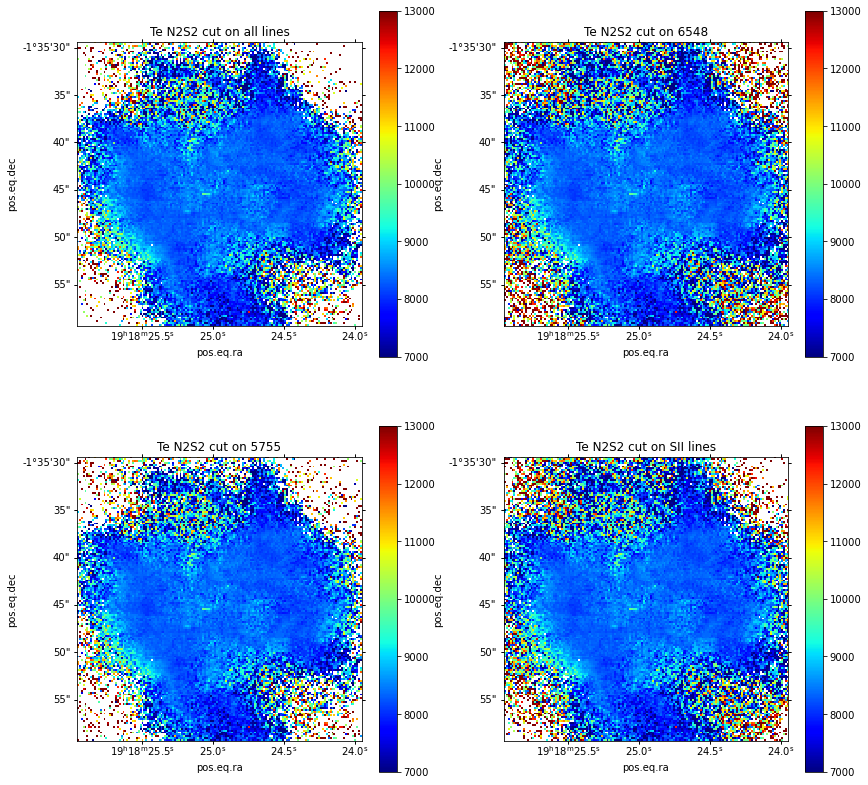

In [13]:
SN_cut = 2
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, subplot_kw={'projection': PL.obs.wcs}, figsize=(14,14))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on all lines', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax2, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on 6548', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A'), SN_cut=SN_cut)
PL.plot(ax=ax3, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on 5755', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('N2_5755A'), SN_cut=SN_cut)
PL.plot(ax=ax4, data=PL.TeNe['N2S2']['Te'], title='Te N2S2 cut on SII lines', vmin=7000, vmax=13000, cmap='jet', 
        label_cut=('S2_6716A', 'S2_6731A'), SN_cut=SN_cut)

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


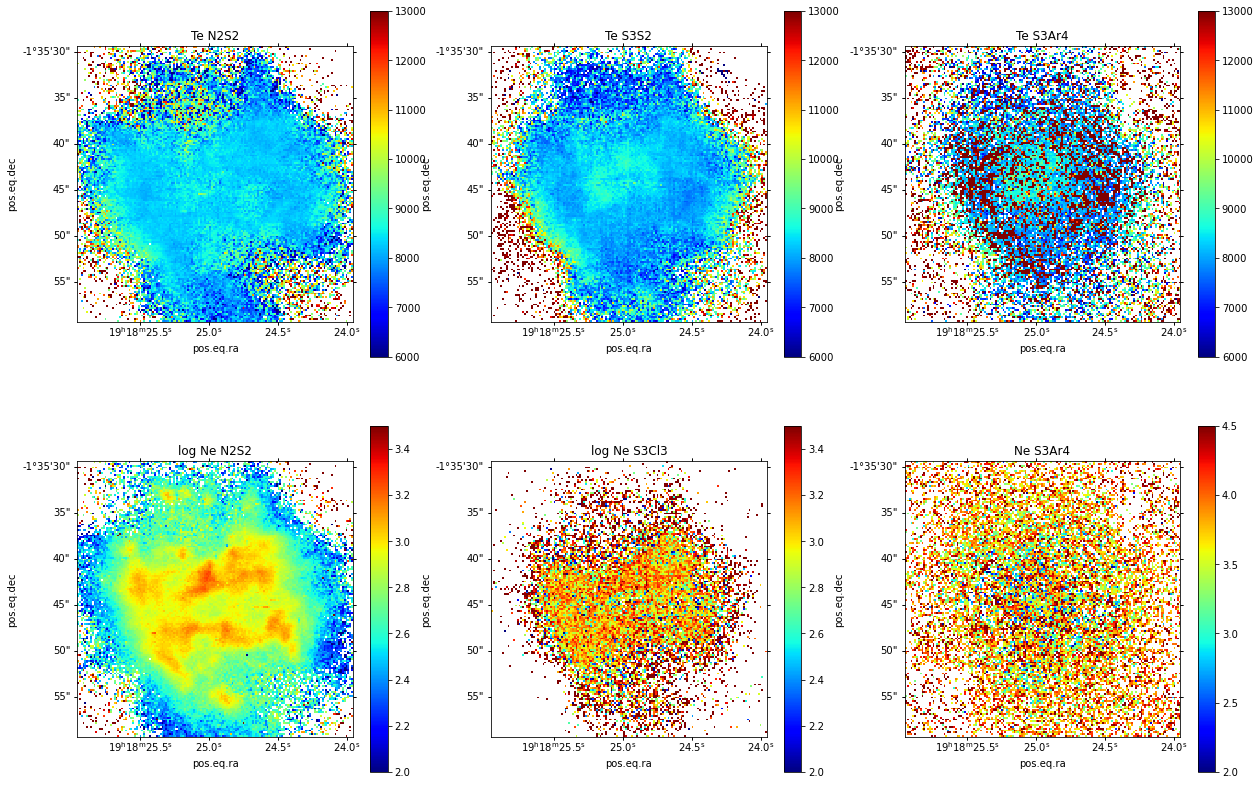

In [14]:
SN_cut = 2
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={'projection': PL.obs.wcs}, figsize=(21,14))
PL.plot(ax=ax1, data=PL.TeNe['N2S2']['Te'], title='Te N2S2', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax2, data=PL.TeNe['S3S2']['Te'], title='Te S3S2', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax3, data=PL.TeNe['S3Ar4']['Te'], title='Te S3Ar4', vmin=6000, vmax=13000, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None)
PL.plot(ax=ax4, data=np.log10(PL.TeNe['N2S2']['Ne']), title='log Ne N2S2', vmin=2, vmax=3.5, cmap='jet', 
        label_cut=('N2_6548A', 'N2_5755A', 'S2_6716A', 'S2_6731A'), SN_cut=SN_cut)
PL.plot(ax=ax5, data=np.log10(PL.TeNe['S3Cl3']['Ne']), title='log Ne S3Cl3', vmin=2, vmax=3.5, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Cl3_5518A', 'Cl3_5538A'), SN_cut=SN_cut, type_='orig')
PL.plot(ax=ax6, data=np.log10(PL.TeNe['S3Ar4']['Ne']), title='Ne S3Ar4', vmin=2, vmax=4.5, cmap='jet', 
        label_cut=('S3_9069A', 'S3_6312A', 'Ar4_4711A', 'Ar4_4740A'), SN_cut=None, type_='median')
f.savefig(PL.PDF_name+'_TeNe.pdf')

/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/Users/christophemorisset/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


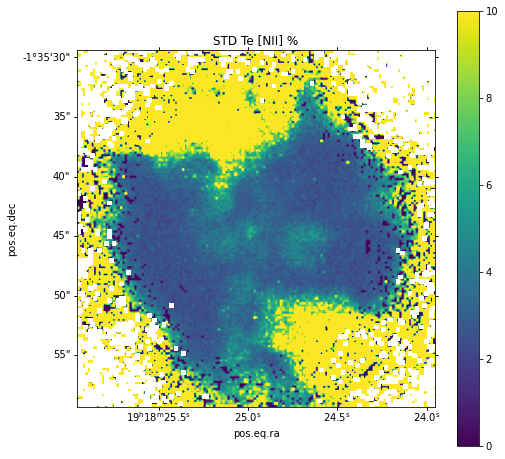

In [15]:
PL.plot_STD(data=PL.TeNe['N2S2']['Te'], vmin=0, vmax=10, title='STD Te [NII] %')

In [16]:
PL.log_.level=3
def set_abunds(self, IP_cut = 35):
    
    atom_dic = {}
    self.abund_dic = {}
    Hbeta = self.obs.getIntens()['H1r_4861A']
    
    
    for line in self.obs.getSortedLines():
        if line.atom not in atom_dic:
            if line.atom[-1] == 'r':
                atom = pn.RecAtom(line.elem, line.spec, case='A')
                IP = pn.utils.physics.IP[atom.elem][atom.spec-1]
            else:
                atom = pn.Atom(line.elem, line.spec)
                if atom.spec-2 < 0:
                    IP = 0.
                else:
                    IP = pn.utils.physics.IP[atom.elem][atom.spec-2]
            atom_dic[line.atom] = (atom, IP)
        else:
            atom, IP = atom_dic[line.atom]
        
        if IP < IP_cut:
            Te = self.TeNe['N2S2']['Te']
            Ne = self.TeNe['N2S2']['Ne']
        else:
            Te = self.TeNe['S3S2']['Te']
            Ne = self.TeNe['S3S2']['Ne']
        self.log_.message('Abund from {} done.'.format(line.label))
        self.abund_dic[line.label] = atom.getIonAbundance(line.corrIntens/Hbeta, Te, Ne, to_eval=line.to_eval, Hbeta=1.)
        
set_abunds(PL)

     Atom Ar3: Making atom object for Ar 3
     Atom Ar3: Reading atom data from ar_iii_atom_MB09.dat
     getLevelsNIST: Reading energies and stat weights from ar_iii_levels.dat
     Atom Ar3: Reading coll data from ar_iii_coll_MB09.dat
     None: Abund from Ar3_7136A done.
     Atom H1: Making rec-atom object for H 1
     Atom H1: HDF5 data read from /Users/christophemorisset/Google Drive/Pro/PyNeb_devel/pyneb/atomic_data_fits//h_i_rec_SH95.hdf5 using Astropy.table
     Atom H1: H1 recombination data read from h_i_rec_SH95.hdf5
     getLevelsNIST: Reading energies and stat weights from h_i_levels.dat
     None: Abund from Ar3_7751A done.
     Atom Ar4: Making atom object for Ar 4
     Atom Ar4: Reading atom data from ar_iv_atom_RGJ19.dat
     getLevelsNIST: Reading energies and stat weights from ar_iv_levels.dat
     Atom Ar4: Reading coll data from ar_iv_coll_RB97.dat
     None: Abund from Ar4_4711A done.
     None: Abund from Ar4_4740A done.
     Atom Ar5: Making atom object for Ar

In [17]:
intenses = PL.obs.getIntens()
for line in PL.obs.getSortedLines():
    intens = PL.obs.reshape(intenses[line.label])[:,:,0]
    abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])
    mask = np.isfinite(intens)
    mask2 = np.isfinite(abund)
    print('{:15s} {:9.2e} {:9.2f} {:9.2f}'.format(line.label, 
                                          intens[mask].sum(), 
                                          np.median(abund[mask2]), 
                                          np.nanstd(abund[mask2])))

<ipython-input-17-c79a421649ca>:4: RuntimeWarning: divide by zero encountered in log10
  abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])
<ipython-input-17-c79a421649ca>:4: RuntimeWarning: invalid value encountered in log10
  abund = 12+np.log10(PL.obs.reshape(PL.abund_dic[line.label])[:,:,0])


Ar3_7136A        3.10e+08      6.36      0.27
Ar3_7751A        7.06e+07      6.30      0.55
Ar4_4711A        2.35e+07      5.67      1.82
Ar4_4740A        1.58e+07      5.75      1.60
Ar5_7005A        9.64e+05      4.54      1.80
C1_8728A         1.47e+06      6.13      1.47
C2r_5342.0A      3.93e+06      9.58      1.78
C2r_6462.0A      3.74e+06      9.34      1.43
Cl3_5518A        1.39e+07      5.19      0.97
Cl3_5538A        1.16e+07      5.21      1.14
Cl4_7531A        2.82e+06      4.86      1.36
Cl4_8046A        4.89e+06      4.51      1.20
H1r_4861A        1.89e+09     12.00      0.00
H1r_6563A        5.38e+09     11.99      0.01
H1r_8750A        1.92e+07     11.97      0.76
H1r_9229A        4.36e+07     11.95      0.53
He1r_4713A       1.88e+07     11.33      1.79
He1r_5876A       4.44e+08     11.21      0.23
He1r_6678A       1.23e+08     11.20      0.18
He1r_7065A       7.18e+07     11.16      0.21
He1r_7281A       1.56e+07     11.07      0.54
He2r_4686A       1.14e+08      9.1

<ipython-input-18-2a84cd68f080>:4: RuntimeWarning: divide by zero encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])
<ipython-input-18-2a84cd68f080>:4: RuntimeWarning: invalid value encountered in log10
  to_show = 12+np.log10(PL.abund_dic[line.label])


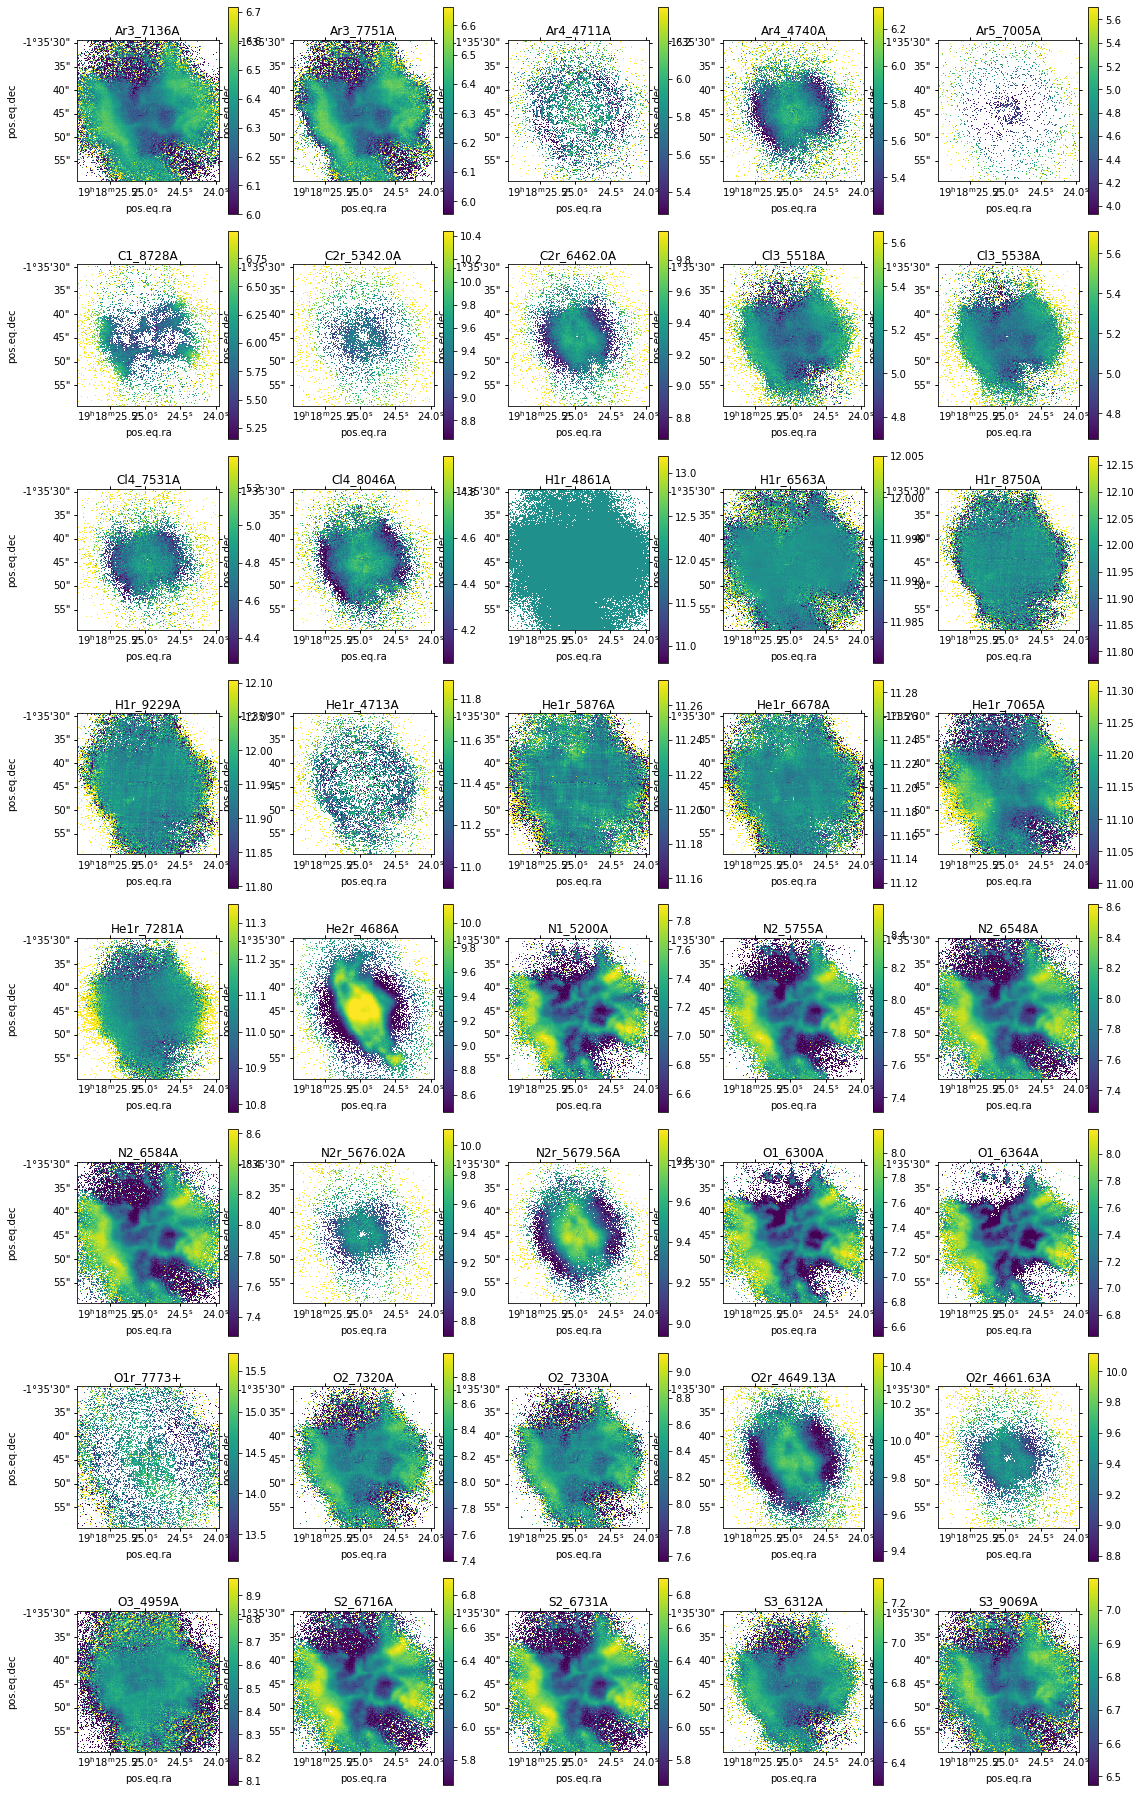

In [18]:
f, axes = plt.subplots(8,5,figsize=(15,25), subplot_kw={'projection': PL.obs.wcs})
for line, ax in zip(PL.obs.getSortedLines()[0:40], axes.ravel()):
    mask = PL.get_mask_SN(line.label, 2.5)
    to_show = 12+np.log10(PL.abund_dic[line.label])
    to_show[np.isinf(to_show)] = np.nan
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    to_show[to_show < (med - 6)] = np.nan
    med = np.nanmedian(PL.get_image(to_show, type_='orig')[~mask])
    std = np.nanstd(PL.get_image(to_show, type_='orig')[~mask])
    vmin = med - 1.5 * std
    vmax = med + 1.5 * std
    #print(line.label, max_to_show, med, std, vmin, vmax, mask.sum())
    PL.plot(data=to_show, title=line.label, ax=ax, vmin=vmin, vmax=vmax, type_='orig', mask=mask)
f.tight_layout()
f.savefig(PL.PDF_name+'_abunds.pdf')